Q1

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.utils import np_utils
from keras.datasets import fashion_mnist
from keras.optimizers import SGD

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(x_train.shape)
print(y_train.shape)

4423680/4422102 [==============================] - 3s 1us/step
(60000, 28, 28)
(60000,)


In [4]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [5]:
input_img = Input(shape=(28, 28, 1))  

x = Conv2D(16, (5, 5), activation='relu', padding='same')(input_img)
print(x.shape)
encoded = MaxPooling2D((2, 2), padding='same')(x)
print(encoded.shape)

x = Conv2D(8, (5, 5), activation='relu', padding='same')(encoded)
print(x.shape)
x = UpSampling2D((2, 2))(x)
print(x.shape)
decoded = Conv2D(1, (7, 7), activation='sigmoid', padding='same')(x)
print(decoded.shape)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')




(?, 28, 28, 16)

(?, 14, 14, 16)
(?, 14, 14, 8)

(?, 28, 28, 8)
(?, 28, 28, 1)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 41s 679us/step - loss: 0.3332 - val_loss: 0.2929
Epoch 2/10
60000/60000 [==============================] - 40s 660us/step - loss: 0.2849 - val_loss: 0.2824
Epoch 3/10
60000/60000 [==============================] - 40s 662us/step - loss: 0.2760 - val_loss: 0.2755
Epoch 4/10
60000/60000 [==============================] - 39s 658us/step - loss: 0.2711 - val_loss: 0.2722
Epoch 5/10
60000/60000 [==============================] - 40s 661us/step - loss: 0.2679 - val_loss: 0.2680
Epoch 6/10
60000/60000 [==============================] - 40s 660us/step - loss: 0.2655 - val_loss: 0.2652
Epoch 7/10
60000/60000 [==============================] - 41s 680us/step - loss: 0.2640 - val_loss: 0.2655
Epoch 8/10
60000/60000 [==============================] - 42s 708us/step - loss: 0.2629 - val_loss: 0.2639
Epoch 9/10
60000/60000 [==============================] - 41s 686us/step - loss: 0.2619 - val

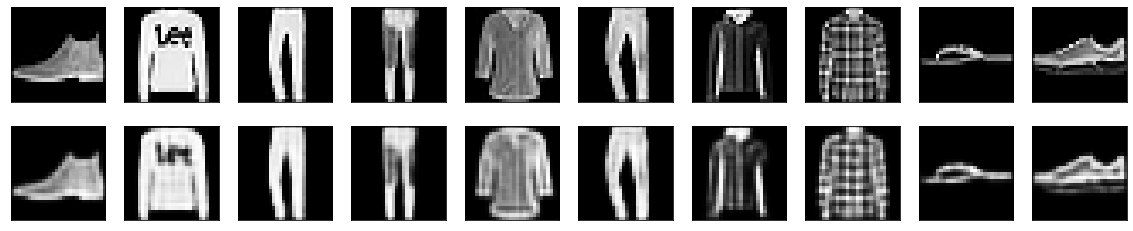

In [7]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Q2

2.1

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Reshape, LeakyReLU

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Activation
import keras
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Reshape, LeakyReLU

In [11]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [12]:
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3), activation = 'relu', input_shape = (28,28,1)))
model.add(Conv2D(32,kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Flatten()) 
model.add(Dense(128, activation = 'relu')) 
model.add(Dropout(0.25))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer='adadelta',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [13]:
history_dCNN = model.fit(x_train, y_train, 
          epochs=5, 
          batch_size=32,
          validation_data = (x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 79s 1ms/step - loss: 0.5300 - acc: 0.8048 - val_loss: 0.3568 - val_acc: 0.8665
Epoch 2/5
60000/60000 [==============================] - 72s 1ms/step - loss: 0.3384 - acc: 0.8796 - val_loss: 0.2883 - val_acc: 0.8936
Epoch 3/5
60000/60000 [==============================] - 73s 1ms/step - loss: 0.2962 - acc: 0.8920 - val_loss: 0.2698 - val_acc: 0.9030
Epoch 4/5
60000/60000 [==============================] - 72s 1ms/step - loss: 0.2770 - acc: 0.9011 - val_loss: 0.2581 - val_acc: 0.9076
Epoch 5/5
60000/60000 [==============================] - 73s 1ms/step - loss: 0.2575 - acc: 0.9081 - val_loss: 0.2625 - val_acc: 0.9062


In [14]:
print(model.evaluate(x_test, y_test))
print(model.evaluate(x_train, y_train))

10000/10000 [==============================] - 3s 336us/step
[0.2625086746454239, 0.9062]
60000/60000 [==============================] - 22s 366us/step
[0.21432073489427567, 0.92315]


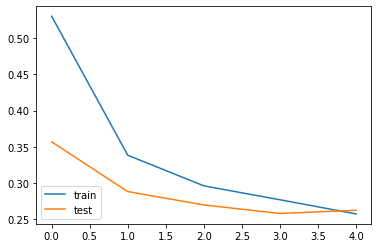

In [15]:
plt.plot(history_dCNN.history['loss'])
plt.plot(history_dCNN.history['val_loss'])
plt.legend(['train', 'test'], loc='lower left')

2.2

In [23]:
from keras.applications import VGG16
import skimage
from skimage.transform import resize
from tqdm import tqdm
from keras.models import Sequential

from keras import backend as K
from keras.layers import Lambda, Input
from keras.models import Model
import cv2

In [24]:
x_train1 = np.asarray([cv2.resize(i, (32,32)) for i in x_train])
x_test1 = np.asarray([cv2.resize(i, (32,32)) for i in x_test])

In [25]:
x_train1 = x_train1.reshape(x_train1.shape[0], 32, 32,1)
x_test1 = x_test1.reshape(x_test1.shape[0], 32, 32, 1)

In [26]:
x_train1 = np.asarray([np.squeeze(np.stack((i, )*3, axis = -1)) for i in x_train1])
x_test1 = np.asarray([np.squeeze(np.stack((i, )*3, axis = -1)) for i in x_test1])

In [ ]:
conv_base = VGG16(weights = "imagenet", include_top=False, input_shape = (32,32,3))

11640832/58889256 [====>.........................] - ETA: 1:17:1 - ETA: 45:46  - ETA: 30:5 - ETA: 28:5 - ETA: 24:2 - ETA: 18:3 - ETA: 20:0 - ETA: 19:1 - ETA: 19:1 - ETA: 22:4 - ETA: 19:5 - ETA: 21:2 - ETA: 21:1 - ETA: 21:4 - ETA: 20:5 - ETA: 21:5 - ETA: 21:0 - ETA: 20:0 - ETA: 21:2 - ETA: 22:3 - ETA: 21:2 - ETA: 22:2 - ETA: 22:2 - ETA: 21:0 - ETA: 21:2 - ETA: 20:5 - ETA: 21:5 - ETA: 21:2 - ETA: 21:2 - ETA: 21:1 - ETA: 20:5 - ETA: 20:5 - ETA: 20:5 - ETA: 21:1 - ETA: 21:3 - ETA: 21:4 - ETA: 21:3 - ETA: 21:2 - ETA: 21:3 - ETA: 22:0 - ETA: 21:4 - ETA: 21:5 - ETA: 22:0 - ETA: 21:5 - ETA: 22:0 - ETA: 21:5 - ETA: 22:0 - ETA: 23:2 - ETA: 22:2 - ETA: 22:3 - ETA: 22:2 - ETA: 22:3 - ETA: 22:2 - ETA: 22:3 - ETA: 22:3 - ETA: 22:2 - ETA: 22:1 - ETA: 22:4 - ETA: 22:3 - ETA: 22:5 - ETA: 22:3 - ETA: 22:4 - ETA: 23:0 - ETA: 23:1 - ETA: 23:3 - ETA: 23:2 - ETA: 23:4 - ETA: 23:4 - ETA: 23:4 - ETA: 23:4 - ETA: 24:1 - ETA: 24:1 - ETA: 24:0 - ETA: 24:0 - ETA: 24:1 - ETA: 24:2 - ETA: 24:1 - ETA: 24:3 - ETA: 24

13410304/58889256 [=====>........................] - ETA: 50:4 - ETA: 50:4 - ETA: 50:5 - ETA: 50:5 - ETA: 50:5 - ETA: 50:5 - ETA: 50:4 - ETA: 50:4 - ETA: 50:4 - ETA: 50:4 - ETA: 50:4 - ETA: 50:4 - ETA: 50:4 - ETA: 50:4 - ETA: 50:4 - ETA: 50:4 - ETA: 50:4 - ETA: 50:4 - ETA: 50:3 - ETA: 50:4 - ETA: 50:3 - ETA: 50:3 - ETA: 50:3 - ETA: 50:3 - ETA: 50:3 - ETA: 50:3 - ETA: 50:3 - ETA: 50:3 - ETA: 50:3 - ETA: 50:3 - ETA: 50:3 - ETA: 50:3 - ETA: 50:3 - ETA: 50:3 - ETA: 50:3 - ETA: 50:3 - ETA: 50:3 - ETA: 50:3 - ETA: 50:3 - ETA: 50:3 - ETA: 50:3 - ETA: 50:3 - ETA: 50:3 - ETA: 50:3 - ETA: 50:4 - ETA: 50:4 - ETA: 50:4 - ETA: 50:4 - ETA: 50:5 - ETA: 50:5 - ETA: 50:4 - ETA: 50:5 - ETA: 50:5 - ETA: 50:5 - ETA: 50:5 - ETA: 50:5 - ETA: 50:5 - ETA: 50:5 - ETA: 50:5 - ETA: 50:5 - ETA: 50:5 - ETA: 50:5 - ETA: 51:0 - ETA: 51:0 - ETA: 51:0 - ETA: 51:0 - ETA: 51:1 - ETA: 51:1 - ETA: 51:1 - ETA: 51:2 - ETA: 51:2 - ETA: 51:1 - ETA: 51:2 - ETA: 51:1 - ETA: 51:2 - ETA: 51:2 - ETA: 51:2 - ETA: 51:2 - ETA: 51:2 -

In [ ]:
T_model = Sequential()
T_model.add(conv_base)
T_model.add(Flatten())
T_model.add(Dense(256, activation="relu"))
T_model.add(Dense(10, activation="softmax"))

In [ ]:
conv_base.trainable = False

In [ ]:
T_model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])

In [ ]:
history = T_model.fit(x_train1,y_train, 
                    epochs=10, 
                    batch_size=150,
                    verbose = 1,
                    validation_data = (x_test1, y_test))

In [ ]:
print(T_model.evaluate(x_test1, y_test))
print(T_model.evaluate(x_train1, y_train))

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'test'], loc='lower left')

Q3

In [ ]:
import pandas as pd
import nltk
import collections
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from keras.applications.vgg16 import preprocess_input
from keras.layers.embeddings import Embedding
from keras.layers import Input, Dense, Dropout, Activation, Flatten, GlobalMaxPooling1D, LSTM
from keras.callbacks import TensorBoard
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from sklearn.utils import class_weight
from keras.layers import LSTM, Conv1D, GlobalMaxPooling1D
import regex as re
from nltk.corpus import stopwords
import gensim
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing import sequence

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

In [ ]:
tweets = pd.read_csv('tweets_with_labels.csv', sep = '\t')

stopWords = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_tweets(tweet):
    tweet = re.sub("@mention", "",tweet)
    tweet = re.sub("{link}", "",tweet)
    tweet = re.sub("[^A-Za-z]"," ",tweet)
    tweet = re.sub(r'\bRT\b', '', tweet)
    tweet = re.sub("\s+"," ",tweet)
    tokens = word_tokenize(tweet)
    words = [word for word in tokens if word not in stopWords]
    words = [stemmer.stem(w).strip("'") for w in words]
    words = [lemmatizer.lemmatize(w, pos="a") for w in words]
    words = [word for word in words if len(word)!=1]
    final_tweet = ' '.join(words)
    return final_tweet

new_tweet = [preprocess_tweets(x) for x in list(tweets.tweet)]
tweets['new_tweets'] = new_tweet

In [ ]:
token = [word_tokenize(x) for x in list(tweets.new_tweets)]

remove_lst=[]
for w in token:
    remove_lst.append(len(w))
bad_idx = [n for n,x in enumerate(remove_lst) if x == 0]
tweets_updated = tweets.drop(bad_idx)

In [ ]:
X = [word_tokenize(x) for x in list(tweets_updated['new_tweets'])]

label = tweets_updated.loc[:,'k1':'k15']
label[tweets_updated != 0] = 1
y = label.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)
print('X_train shape: ', len(X_train))
print('X_test shape: ', len(X_test))
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

In [ ]:
X_train_padded = sequence.pad_sequences(X_train, maxlen=40, padding="post", truncating="post", value='_pad_',dtype=object)
X_test_padded = sequence.pad_sequences(X_test, maxlen=40, padding="post", truncating="post", value='_pad_',dtype=object)

train_corpus = list(tweets_updated.new_tweets)
train_cor_tk = [word_tokenize(x) for x in train_corpus]
corpus_padded = sequence.pad_sequences(train_cor_tk, maxlen=40,padding="post", truncating="post", value='_pad_',dtype=object)

corpus_padded = corpus_padded.tolist()
X_train_padded = X_train_padded.tolist()
X_test_padded = X_test_padded.tolist(

In [ ]:
w2v_model = Word2Vec(corpus_padded, min_count=1, size = 20, workers=1, window=3)

X_train_vec = np.empty([len(X_train), 40, 20])
X_test_vec = np.empty([len(X_test), 40, 20])

idx_train = 0
for w in X_train_padded:
    X_train_vec[idx_train, :, :] = w2v_model[w]
    idx_train += 1

idx_test = 0
for w in X_test_padded:
    X_test_vec[idx_test,:,:] = w2v_model[w]
    idx_test += 1

print('X_train_vec shape: ', X_train_vec.shape)
print('X_test_vec shape: ', X_test_vec.shape)

In [ ]:
model_rnn = Sequential()
model_rnn.add(LSTM(128, input_shape = (40, 20)))
model_rnn.add(Dense(128, activation = 'relu'))
model_rnn.add(Dropout(0.2))
model_rnn.add(Dense(64, activation = 'relu'))
model_rnn.add(Dropout(0.2))
model_rnn.add(Dense(15, activation ='sigmoid'))

model_rnn.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

history = model_rnn.fit(X_train_vec, y_train,
                        epochs=10, batch_size=500,
                        validation_data=(X_test_vec, y_test))

In [ ]:
score = model_rnn.evaluate(X_test_vec, y_test, batch_size=64, verbose = 0)
from sklearn import metrics
import matplotlib.pyplot as plt

print('Train loss: ', history.history['loss'][9]) 
print('Train accuracy: ', history.history['acc'][9])

print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

3.2

In [ ]:
model_cnn = Sequential()
model_cnn.add(Conv1D(128, 3, activation='relu', padding = 'valid', strides=1, input_shape=(40,20)))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(64))
model_cnn.add(Dropout(0.2))
model_cnn.add(Activation('relu'))
model_cnn.add(Dense(15, activation ='sigmoid'))

model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_cnn = model_cnn.fit(X_train_vec, y_train, epochs=10, batch_size=128,
                        validation_data=(X_test_vec, y_test))

In [ ]:
score_cnn = model_cnn.evaluate(X_test_vec, y_test, batch_size=64, verbose = 0)

print('Train loss: ', history_cnn.history['loss'][9]) 
print('Train accuracy: ', history_cnn.history['acc'][9])

print('Test loss: ', score_cnn[0])
print('Test accuracy: ', score_cnn[1])

3.3

In [ ]:
plt.plot(history.history['acc'], label='RNN train accuracy', color = 'r')
plt.plot(history_cnn.history['acc'], label = 'CNN train accuracy', color = 'k')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')
plt.title('Text Classification Accuracy RNN CNN Comparison')

In [ ]:
plt.plot(history.history['loss'], label='RNN train loss', color = 'r')
plt.plot(history_cnn.history['loss'], label = 'CNN train loss', color = 'k')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 0.5])
plt.legend(loc='lower right')
plt.title('Text Classification Loss RNN CNN Comparison')